In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#input 1 dataset
df=pd.read_csv(r"D:\Rahul\MSC\Trimester4\DL\Assignment5\train.csv")

In [3]:
#first few records of input dataset
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
#shape of input 1 dataset
df.shape

(21263, 82)

In [5]:
#columns of input 1 dataset
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [6]:
#datatypes of all atributes of input 1 dataset
df.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
critical_temp            float64
Length: 82, dtype: object

In [7]:
#input 2
df1=pd.read_csv(r"D:\Aadesh\MSC\Trimester4\DL\Assignment5\unique_m.csv")

In [8]:
#first 5 records of input 2
df1.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [9]:
#droping unnecessary columns
df1.drop('material',axis=1,inplace=True)

In [10]:
#as it is available in input 1 dataset too
df1.drop('critical_temp',axis=1,inplace=True)

In [11]:
#shape of input 2 dataset
df1.shape

(21263, 86)

In [12]:
#adding both the dataframes
data = pd.concat([df1, df], axis=1)

In [13]:
#after concat
data.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [14]:
#columns in new dataframe
data.columns

Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne',
       ...
       'wtd_mean_Valence', 'gmean_Valence', 'wtd_gmean_Valence',
       'entropy_Valence', 'wtd_entropy_Valence', 'range_Valence',
       'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence', 'critical_temp'],
      dtype='object', length=168)

In [15]:
#shape of new dataset
data.shape

(21263, 168)

In [16]:
x=data.drop('critical_temp',axis=1) #all except critical temp
y=data[['critical_temp']] #critical temp

In [17]:
x_train_full,x_test,y_train_full,y_test=train_test_split(x,y,test_size=0.3) #spliting data into training and testing
x_train,x_val,y_train,y_val=train_test_split(x_train_full,y_train_full,test_size=0.2) #spliting training data into training and validation
scaler=StandardScaler() #transforming x/independent data
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [18]:
#storing it as a dataframe
x_train_df=pd.DataFrame(x_train_scaled) 
x_val_df=pd.DataFrame(x_val_scaled)

In [19]:
x1_input=x_train_df.iloc[:,:86] #training input 1
x2_input=x_train_df.iloc[:,86:] #training input 2
x1_valid=x_val_df.iloc[:,:86] #validation input 1
x2_valid=x_val_df.iloc[:,86:] #validation input 2

In [20]:
x1_input.shape

(11907, 86)

In [21]:
x1_input.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,-0.062076,0.0,-0.094527,-0.04069,-0.180989,-0.082019,-0.106272,-0.790287,-0.109458,0.0,...,-0.06971,-0.105779,-0.037625,-0.189974,-0.178851,-0.143617,-0.310848,0.0,0.0,0.0
1,-0.062076,0.0,-0.094527,-0.04069,-0.180989,-0.082019,-0.106272,-0.790287,-0.109458,0.0,...,-0.06971,-0.105779,-0.037625,-0.189974,-0.178851,-0.143617,-0.310848,0.0,0.0,0.0
2,-0.062076,0.0,-0.094527,-0.04069,-0.180989,-0.082019,-0.106272,-0.526599,-0.109458,0.0,...,-0.06971,-0.105779,-0.037625,-0.189974,-0.178851,-0.143617,-0.310848,0.0,0.0,0.0
3,-0.062076,0.0,-0.094527,-0.04069,-0.180989,-0.082019,-0.106272,1.076623,-0.109458,0.0,...,-0.06971,-0.105779,-0.037625,-0.189974,-0.178851,-0.143617,-0.310848,0.0,0.0,0.0
4,-0.062076,0.0,-0.094527,-0.04069,-0.180989,-0.082019,-0.106272,0.264464,-0.109458,0.0,...,-0.06971,-0.105779,-0.037625,-0.189974,-0.178851,-0.143617,-0.310848,0.0,0.0,0.0


In [22]:
x2_input.shape

(11907, 81)

In [23]:
x2_input.head()

,86,87,88,89,90,91,92,93,94,95,...,157,158,159,160,161,162,163,164,165,166
0,-2.153100,0.837220,1.176108,1.325453,1.468088,-3.164740,-2.630075,-2.100172,-1.229908,-2.194396,...,-1.142527,-0.962582,-1.004823,-0.893015,-3.265244,-2.756183,-1.632028,-1.509098,-1.718811,-1.469876
1,-1.463786,-0.936059,0.097137,-0.687700,0.259740,-1.718333,-1.892271,-0.901975,1.095970,-0.563582,...,0.776028,1.138523,0.789582,1.153545,-1.598998,-1.578513,-0.032772,1.556189,0.331227,0.418005
2,0.604155,-0.630818,0.226963,-0.541281,0.243819,0.679040,0.167719,0.104981,0.173582,-0.119072,...,-1.142527,-0.848522,-1.111957,-0.800258,0.656578,0.713371,-0.032772,-0.640600,-0.422253,-0.679121
3,0.604155,-0.286218,-0.637939,-0.367130,-0.657263,0.605535,0.946565,0.133670,-0.736561,0.300376,...,-0.950672,-0.882264,-0.842967,-0.825649,0.749903,0.582482,-0.832400,-0.465463,-0.898796,-0.828986
4,0.604155,0.417888,-0.456463,0.198420,-0.616571,0.745786,0.121542,0.230663,0.017646,0.352415,...,-0.758816,-0.734462,-0.667439,-0.694648,0.736958,0.127063,-0.832400,-0.370563,-0.714501,-0.500465


In [24]:
input1 = keras.layers.Input(shape=[86]) #86 is the number of attributes in input 1
input2 = keras.layers.Input(shape=[81])#81 is the number of attributes in input 2

In [25]:
hidden1 = keras.layers.Dense(86, activation="relu")(input1) #passing input 1
hidden2 = keras.layers.Dense(72, activation="relu")(hidden1) #output of hidden 1 as input
hidden3 = keras.layers.Dense(40, activation="relu")(hidden2)#output of hidden 2 as input
hidden4 = keras.layers.Dense(81, activation="relu")(hidden3)#output of hidden 4 as input
concat = keras.layers.Concatenate()([input2, hidden4]) #passing two input- input 2 and output of hidden 4
output = keras.layers.Dense(1)(concat) #regression output

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [26]:
model = keras.models.Model(inputs=[input1,input2], outputs=[output]) #specifing input and output

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 86)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 86)           7482        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 72)           6264        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 40)           2920        dense_1[0][0]                    
______________________________________________________________________________________________

In [28]:
#from tensorflow.keras.metrics import RootMeanSquaredError

In [29]:
model.compile(loss="mean_squared_logarithmic_error", optimizer="sgd")

In [30]:
#fiting the model with valid input and validation set
history = model.fit((x1_input,x2_input), y_train, epochs=50,validation_data=((x1_valid,x2_valid) , y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 11907 samples, validate on 2977 samples
Epoch 1/50
11907/11907 [==============================] - 2s 178us/sample - loss: 1.8995 - val_loss: 0.9415
Epoch 2/50
11907/11907 [==============================] - 1s 45us/sample - loss: 0.7483 - val_loss: 0.5972
Epoch 3/50
11907/11907 [==============================] - 1s 47us/sample - loss: 0.5493 - val_loss: 0.5017
Epoch 4/50
11907/11907 [==============================] - 1s 46us/sample - loss: 0.4802 - val_loss: 0.5027
Epoch 5/50
11907/11907 [==============================] - 1s 47us/sample - loss: 0.4540 - val_loss: 0.4361
Epoch 6/50
11907/11907 [==============================] - 1s 47us/sample - loss: 0.4216 - val_loss: 0.4158
Epoch 7/50
11907/11907 [==============================] - 1s 46us/sample - loss: 0.3985 - val_loss: 0.3957
Epoch 8/50
11907/11907 [==============================] - 1s 51us/sample - loss: 0.3800 - val_loss: 0.4033


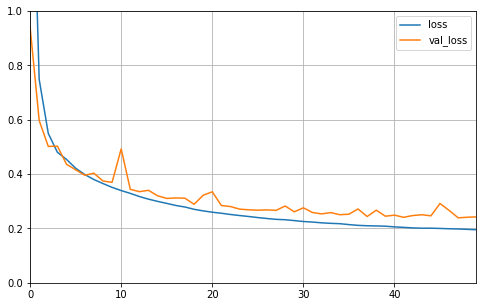

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()